In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

import tensorflow as tf
keras = tf.keras

from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM

In [2]:
beml_data = pd.read_csv('/kaggle/input/nse-defence-stocks-india/BEML.NS.csv', index_col='Date')

In [3]:
beml_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,102.949997,114.949997,99.000000,107.000000,88.549309,6211822
2002-07-08,107.000000,108.500000,97.150002,99.300003,82.177078,1603293
2002-07-15,100.250000,100.750000,84.099998,93.300003,77.211708,4264574
2002-07-22,90.099998,102.000000,81.599998,83.199997,68.853310,3993350
2002-07-29,84.000000,84.449997,61.000000,69.199997,57.267414,3791395


<AxesSubplot:xlabel='Date'>

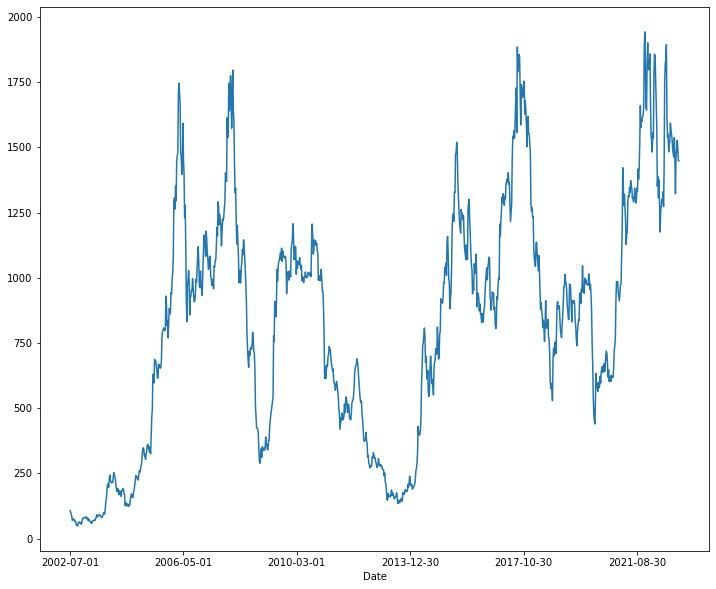

In [4]:
beml_data['Close'].plot(figsize=(12,10))

In [5]:
beml_data = beml_data.dropna()

In [6]:
scaled_beml_data = scaler.fit_transform(beml_data)

In [ ]:
scaled_beml_data.shape

In [7]:
look_back = 6

beml_data_generator = TimeseriesGenerator(scaled_beml_data, scaled_beml_data, length=look_back, batch_size=1)

In [8]:
beml_model = Sequential()

n_features = scaled_beml_data.shape[1]

beml_model.add(LSTM(128, activation='relu', return_sequences=True , input_shape=(look_back,n_features)))
beml_model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(look_back,n_features)))
beml_model.add(LSTM(512, activation='relu',  input_shape=(look_back,n_features)))

beml_model.add(Dense(n_features))

beml_model.compile(optimizer='adam', loss='mse')

2023-02-04 03:06:20.904808: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
beml_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6, 128)            69120     
_________________________________________________________________
lstm_1 (LSTM)                (None, 6, 256)            394240    
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               1574912   
_________________________________________________________________
dense (Dense)                (None, 6)                 3078      
Total params: 2,041,350
Trainable params: 2,041,350
Non-trainable params: 0
_________________________________________________________________


In [10]:
beml_model.fit(beml_data_generator, epochs=500)

2023-02-04 03:06:27.433214: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
1069/1069 [==============================] - 42s 34ms/step - loss: 0.0089
Epoch 2/500
1069/1069 [==============================] - 37s 35ms/step - loss: 0.0045
Epoch 3/500
1069/1069 [==============================] - 36s 34ms/step - loss: 0.0027
Epoch 4/500
1069/1069 [==============================] - 36s 34ms/step - loss: 0.0022
Epoch 5/500
1069/1069 [==============================] - 37s 34ms/step - loss: 0.0019
Epoch 6/500
1069/1069 [==============================] - 37s 35ms/step - loss: 0.0020
Epoch 7/500
1069/1069 [==============================] - 36s 34ms/step - loss: 0.0019
Epoch 8/500
1069/1069 [==============================] - 36s 33ms/step - loss: 0.0017
Epoch 9/500
1069/1069 [==============================] - 37s 34ms/step - loss: 0.0016
Epoch 10/500
1069/1069 [==============================] - 36s 34ms/step - loss: 0.0016
Epoch 11/500
1069/1069 [==============================] - 37s 34ms/step - loss: 0.0015
Epoch 12/500
1069/1069 [============================

In [11]:
beml_model.save('/kaggle/working/beml_model.h5')

In [12]:
# for exporting important objects of model
import joblib

# create PKL files of important objects required for project
# these are required for prediction of future stock prices and also for the flask app
joblib.dump(scaler, "/kaggle/working/scaler.pkl")
joblib.dump(scaled_beml_data, "/kaggle/working/scaled_beml_data.pkl")
joblib.dump(look_back, "/kaggle/working/look_back.pkl")

['/kaggle/working/look_back.pkl']

<AxesSubplot:>

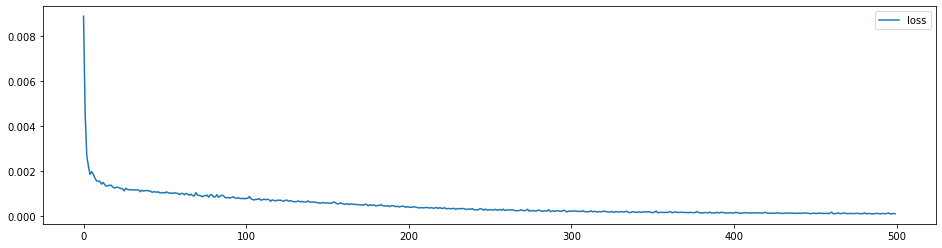

In [13]:
beml_loss = pd.DataFrame(beml_model.history.history)
beml_loss.plot(figsize=(16,4))